 # Least Squares
In diesem Notebook werden wir lineare Regression (least squares) implementieren und auf die Auto-Daten anwenden, um Gebrauchtwagenpreise auf EBay vorherzusagen.

## 1. Implementierung

Implementieren Sie eine Methode *leastsquares()*, die gemäß der Formel aus den Videos die Parameter $(a,b)$ einer Ausgleichsgerade ermittelt und zurückliefert.
Ihre Methode erhält mit x und y zwei Numpy-Arrays der Länge $n$ mit den x- und y-Koordinaten der gegebenen Stichprobe.

*Hinweis: Sie benötigen Kennwerte wie Mittelwert oder Varianz. Verwenden Sie hierzu numpy-Methoden wie mean() und var().*

*Hinweis: Sie können zur Berechnung der Kovarianz die Methode np.cov() heranziehen. Falls Sie dies möchten, setzen Sie den Parameter bias auf True.*


In [27]:
import numpy as np

def leastsquares(x,y):
    a = np.cov((x,y))[0][1] / np.var(x)
    b = np.mean(y) - a * np.mean(x)

    return a, b

In [28]:
# test
x = np.array([1,2,3,4])
y = np.array([1,2,5,7])

a, b = leastsquares(x, y)

print(a)
print(b)

2.8
-3.25


## 2. Kleiner Test
Wir verwenden zunächst eine kleine Stichprobe: 
$$(x_1,y_1), ..., (x_4,y_4) = (1,1), (2,2), (3,5), (4,7).
$$
Testen Sie Ihre Methode *leastsquares()*, indem Sie sie auf die Daten anwenden und dann Daten und Gerade mit der Funktion *plot()* plotten.

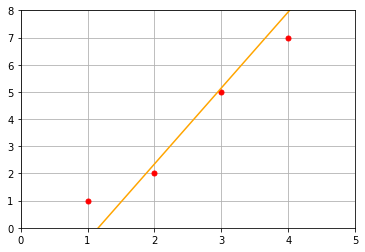

In [29]:
import matplotlib.pyplot as plt

def plot(x, y, a, b):
    """ 
          ! DO NOT TOUCH !

          This method plots the 2D point cloud (x,y) in red, 
          and the fitted line (a,b) in orange.
    """
    plt.plot(x, y, 'o', color='red', markersize=5)
    xmin = np.min(x)-1
    xmax = np.max(x)+1
    ymin = np.min(y)-1
    ymax = np.max(y)+1    
    plt.axis([xmin,xmax,ymin,ymax]) # set range to plot
    xticks = np.arange(xmin, xmax, (xmax-xmin)/1000.)
    plt.plot(xticks, a*xticks+b, '-', color='orange')
    
    plt.grid(True)
    plt.show()    
    
x = np.array([1,2,3,4])
y = np.array([1,2,5,7])
a,b = leastsquares(x,y)
plot(x,y,a,b)

## 3. Autodaten laden
Laden Sie die bekannten Autodaten 'cars.csv'. Führen Sie hierzu die nächste Zelle aus.

In [8]:
import pandas

# Anmerkung: Man kann die Datei auch in Excel/Libreoffice öffnen.
cars = pandas.read_csv('data/cars.csv')

# Wir geben die Namen der Spalten/Merkmale aus.
columns = cars.columns
for i,col in enumerate(columns):
    print('%.2d : %s' %(i,col))
    
# Wir konvertieren die Daten in ein Numpy-Array.
data = cars.values.astype('float')

# Wir filtern alle Autos die teurer als 50.000 EUR sind.
data = data[data[:,0]<50000,:]
# Wir filtern alle Autos die billiger als 1.000 EUR sind.
data = data[data[:,0]>=1000,:]

00 : dollar_price
01 : registration_year
02 : power_ps
03 : kilometer
04 : postal_code
05 : type__bus
06 : type__cabrio
07 : type__coupe
08 : type__kleinwagen
09 : type__kombi
10 : type__limousine
11 : type__suv
12 : gearbox__automatik
13 : gearbox__manuell
14 : fuel__benzin
15 : fuel__diesel
16 : brand__alfa_romeo
17 : brand__audi
18 : brand__bmw
19 : brand__chevrolet
20 : brand__chrysler
21 : brand__citroen
22 : brand__dacia
23 : brand__daewoo
24 : brand__daihatsu
25 : brand__fiat
26 : brand__ford
27 : brand__honda
28 : brand__hyundai
29 : brand__jaguar
30 : brand__jeep
31 : brand__kia
32 : brand__lada
33 : brand__lancia
34 : brand__land_rover
35 : brand__mazda
36 : brand__mercedes_benz
37 : brand__mini
38 : brand__mitsubishi
39 : brand__nissan
40 : brand__opel
41 : brand__peugeot
42 : brand__porsche
43 : brand__renault
44 : brand__rover
45 : brand__saab
46 : brand__seat
47 : brand__skoda
48 : brand__smart
49 : brand__subaru
50 : brand__suzuki
51 : brand__toyota
52 : brand__trabant
5

## 4. Autopreise vorhersagen
Verwenden Sie nun Ihr Least-Squares-Modell, um den *Preis* eines Autos vorherzusagen, gegeben den *Kilometerstand*. 
* Extrahieren Sie hierzu beide Spalten aus der Matrix *data* und rufen Sie leastsquares() auf, um die Parameter $a$ und $b$ zu bestimmen.
* Ermitteln Sie dann für die ersten zehn Autos die Vorhersage Ihres Modells und vergleichen Sie sie mit den echten Preisen.

Wirken die Ergebnisse (halbwegs) plausibel?

In [25]:
# KM
x = data[:,3]
y = data[:,0]

a, b = leastsquares(x,y)

preds = []
for i in range(0,10):
    preds_ = a * data[i][0] + b
    preds.append(preds_)

preds

[16095.420813624713,
 17493.701867995245,
 17318.916736198928,
 17435.44015739647,
 17452.08636042469,
 17385.584779326953,
 16120.473349182184,
 17472.89411420997,
 16990.154226391573,
 17464.57101269586]

In [26]:
# compare with real values
for i in range(0,10):
    print(data[i][0])

18300.0
1500.0
3600.0
2200.0
2000.0
2799.0
17999.0
1750.0
7550.0
1850.0


## 5. Modell bewerten
Schreiben Sie eine Funktion *error()*, die ermittelt um *wieviel Prozent* der echte Preis vom vorhergesagten Preis abweicht - gemittelt über alle Autos.
Ihre Funktion erhält als Parameter die prognostizierten Preise und die echten Preise. 
Rufen Sie error() für Ihr Modell auf. Um wieviel Prozent weicht die kilometerstandsbasierte Prognose im Schnitt vom echten Preis ab?

In [ ]:
def error(ypredicted, yreal):
    
    
    

# FIXME

## 6. Merkmale vergleichen
Versuchen Sie nun, den Preis nicht nur anhand des Kilometerstandes vorherzusagen, sondern versuchen Sie es mit *jedem* Merkmal (dem Zulassungsjahr, den PS, dem Kilometerstand, etc.). Für jedes Merkmal:
* Bestimmen Sie die Parameter a,b, mit leastsquares()
* Ermitteln Sie die vorhergesagten Preise
* Geben Sie den prozentualen Fehler aus, mit error().

Welches Merkmal ist das beste, d.h. es führt zum geringsten Fehler?

In [ ]:
# FIXME